In [1]:
import geopandas
import pandas as pd
import numpy as np

from tqdm import tqdm
from scipy.spatial import cKDTree

from shapely.geometry import Point, box
from shapely.strtree import STRtree
from shapely.ops import nearest_points

from litecoder.models import WOFLocality

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('seaborn-muted')

In [3]:
rows = []
for loc in WOFLocality.clean_us_cities():
    rows.append((loc.wof_id, loc.name, loc.us_state_abbr, loc.longitude, loc.latitude, loc.population))
    
df = pd.DataFrame(rows, columns=('wof_id', 'name', 'state', 'longitude', 'latitude', 'population'))

In [4]:
df['point'] = list(zip(df.longitude, df.latitude))
df['point'] = df['point'].apply(Point)

In [5]:
gdf = geopandas.GeoDataFrame(df, geometry='point')

In [8]:
gdf[gdf.state=='LA'].head(10)

,wof_id,name,state,longitude,latitude,population,point
10169,85947793,Lake Providence,LA,-91.182473,32.813235,NaN,POINT (-91.182473 32.813235)
10170,85947797,Vivian,LA,-93.986286,32.871410,NaN,POINT (-93.98628600000001 32.87141)
10171,85947799,Rodessa,LA,-93.996900,32.973486,NaN,POINT (-93.9969 32.973486)
10172,85947801,Oil City,LA,-93.975759,32.745295,NaN,POINT (-93.975759 32.745295)
10173,85947803,Mooringsport,LA,-93.960654,32.683180,NaN,POINT (-93.96065400000001 32.68318)
10174,85947805,Ida,LA,-93.894580,32.999554,NaN,POINT (-93.89458 32.999554)
10175,85947807,Hosston,LA,-93.882039,32.884909,NaN,POINT (-93.88203900000001 32.884909)
10176,85947809,Greenwood,LA,-93.963620,32.436059,NaN,POINT (-93.96362000000001 32.436059)
10177,85947811,Gilliam,LA,-93.843290,32.828962,NaN,POINT (-93.84329 32.828962)
10178,85947815,Blanchard,LA,-93.884380,32.609009,NaN,POINT (-93.88437999999999 32.609009)


In [14]:
gdf.population = gdf.population.fillna(gdf.population.median())

790


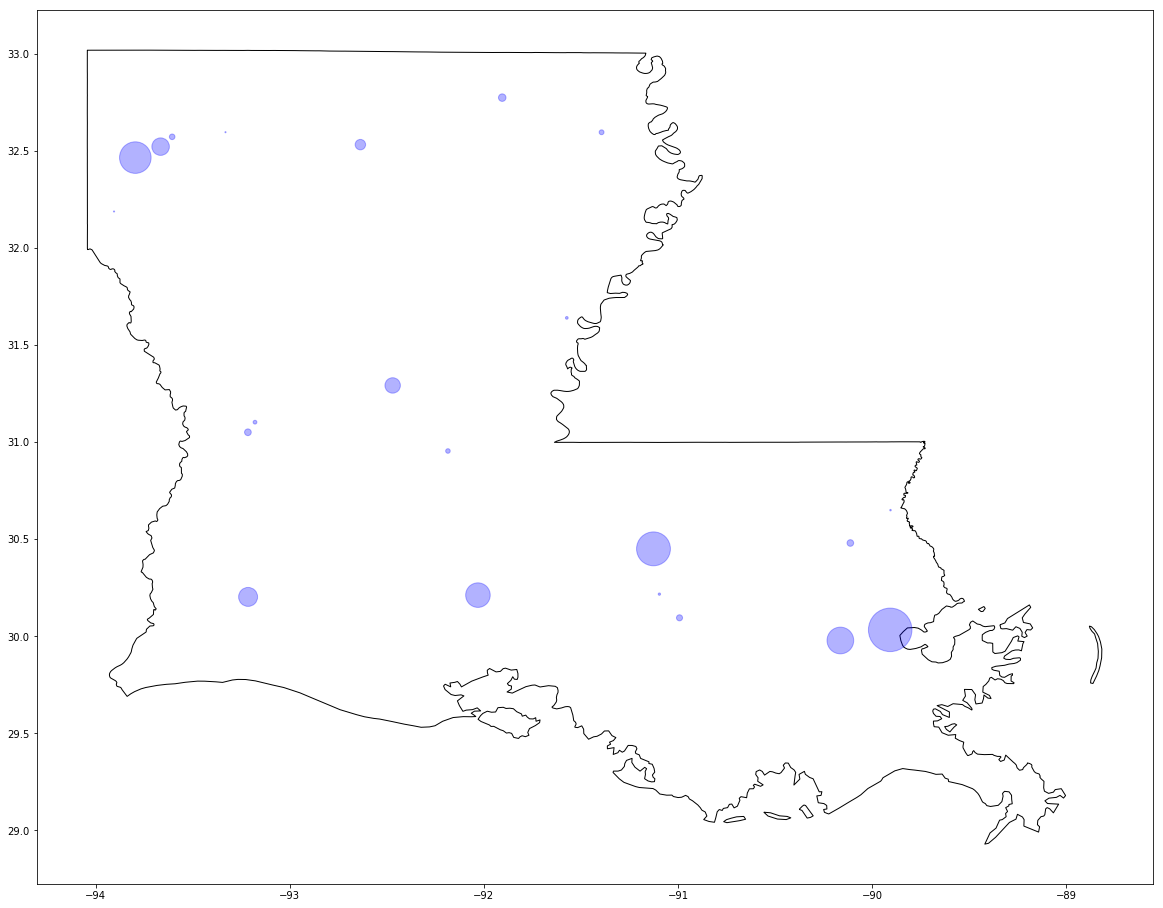

In [7]:
state = 'LA'

states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))

sdf = gdf[gdf.state==state]
print(len(sdf))

sdf.plot(ax=ax, color='blue', markersize=sdf['population'] / 200, alpha=0.3)
plt.show()